In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [437]:
titanic = pd.read_csv('train.csv')

In [438]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [439]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [440]:
titanic['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [441]:
def notation(plot , coordinator , dataframe , percent = False):
        total = len(dataframe)
        for p in plot.patches:
            height = p.get_height().round(2)
            text = str(height)
            if percent == True:
                plot.text(p.get_x() + p.get_width() / 2 , height + coordinator , text + ' | ' + str(height * 100 // total) + '%' , ha = 'center')
            else:
                plot.text(p.get_x() + p.get_width() / 2 , height + coordinator , text , ha = 'center')

In [442]:
# Cleannig Survived Columns
titanic['Survived'] = titanic['Survived'].map({0: 'Dead', 1: 'Alived'})
# Cleannig Pclass Columns
titanic['Pclass'] = titanic['Pclass'].map({1:'First Class' , 2:'Second Class' , 3:'Third Class'})
# Cleannig Sex Columns
titanic['Sex'] = titanic['Sex'].map({'male':'Male' , 'female':'Female'})
# Cleannig Age Columns
titanic['Age'] = titanic['Age'].fillna(0)
titanic['Age'] = titanic['Age'].astype('int')
titanic['Age'] = titanic['Age'].apply(lambda x: 1 if x <= 1 else x)
# Cleanning Embarked Columns
titanic['Embarked'] = titanic['Embarked'].map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

In [443]:
color_classes = {'First Class': '#FFC425', 
              'Second Class': '#D8D8D8', 
              'Third Class': '#CD8032'}

color_dead_alive = {'Dead':'#D11141',
                    'Alived':'#00B159'}

color_sex = {'Male':'#3056B9', 
             'Female':'#F99ED4'}

color_embarked = {'Cherbourg' : '#18C10F',
                  'Queenstown' : '#FBED37', 
                  'Southampton' : '#F78F49'}

In [444]:
titanic['Survived'].value_counts().to_frame()

,Survived
Dead,549
Alived,342


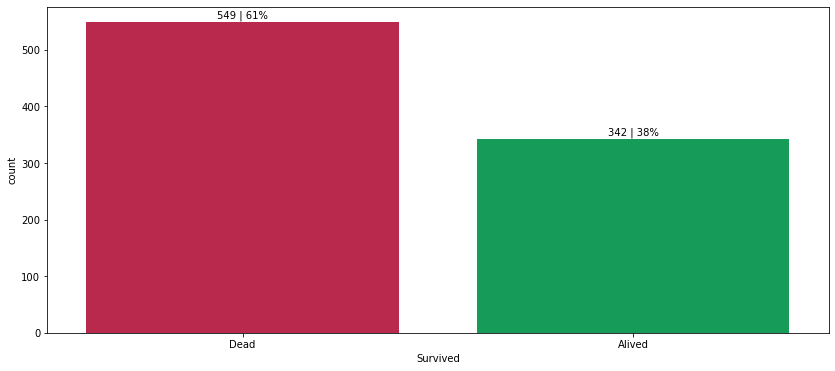

In [445]:
plt.figure(figsize = (14, 6))
survived = sns.countplot(x = 'Survived' , data= titanic, palette = color_dead_alive)
notation(survived , 7 , titanic , True)
plt.show()

In [446]:
titanic['Sex'].value_counts().to_frame()

,Sex
Male,577
Female,314


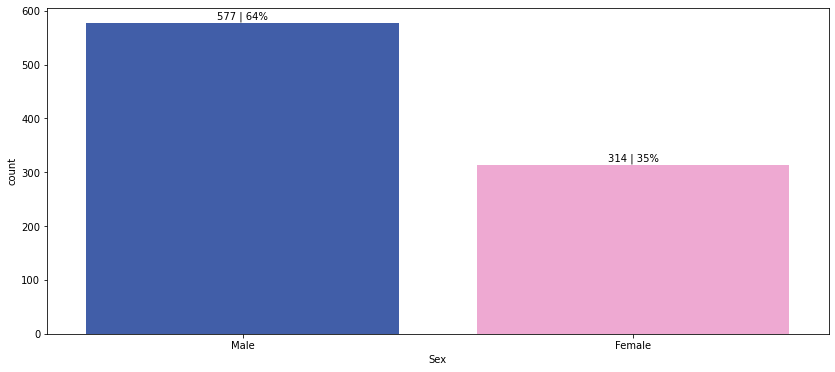

In [447]:
plt.figure(figsize = (14, 6))
survived = sns.countplot(x = 'Sex' , data= titanic, palette = color_sex)
notation(survived , 7 , titanic , True)
plt.show()

In [448]:
titanic['Pclass'].value_counts().to_frame()

,Pclass
Third Class,491
First Class,216
Second Class,184


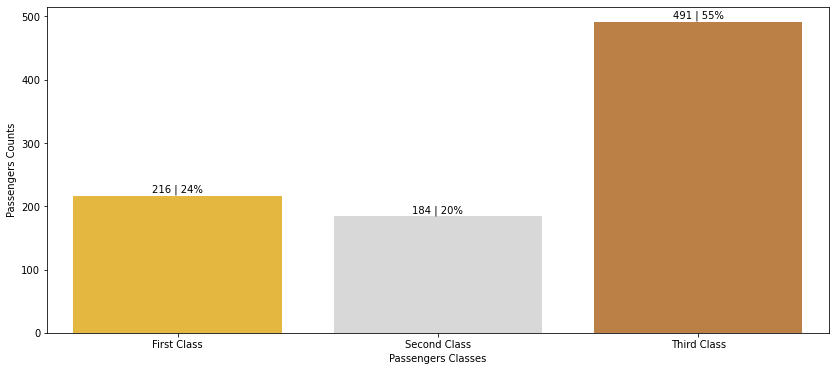

In [449]:
plt.figure(figsize = (14, 6))
pclass = sns.countplot(x = 'Pclass' , data= titanic, order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_dict)
notation(pclass , 6 , titanic, True)
plt.xlabel('Passengers Classes')
plt.ylabel('Passengers Counts')
plt.show()

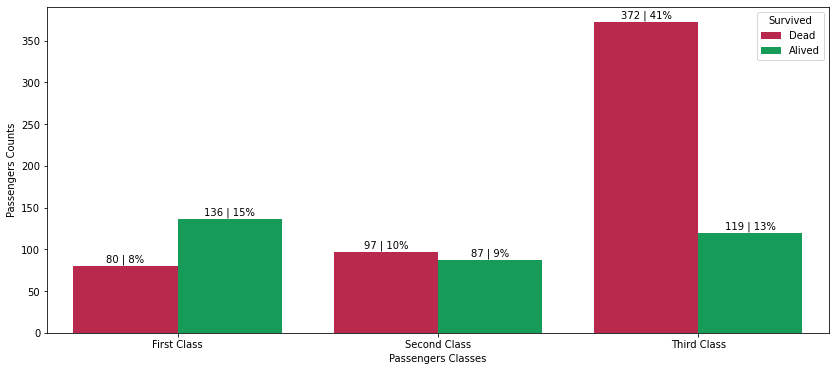

In [450]:
plt.figure(figsize = (14, 6))
pclass_survived = sns.countplot(x = 'Pclass' , hue = 'Survived' , data = titanic, order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_dead_alive)
notation(pclass_survived , 5, titanic , True)
plt.xlabel('Passengers Classes')
plt.ylabel('Passengers Counts')
plt.show()

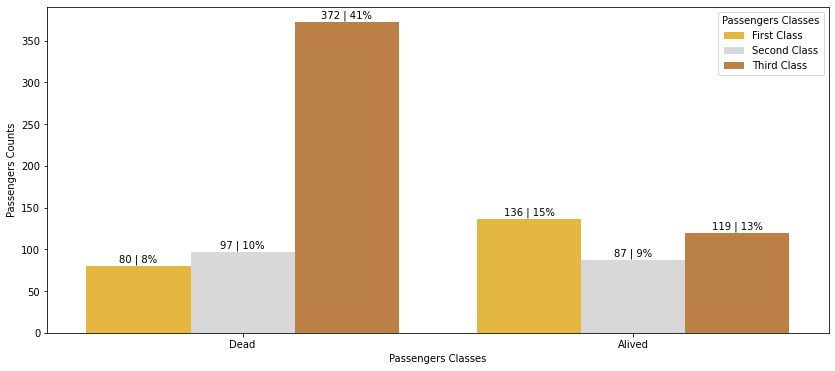

In [451]:
plt.figure(figsize = (14, 6))
pclass_survived = sns.countplot(x = 'Survived' , hue = 'Pclass' , hue_order = ['First Class' , 'Second Class' , 'Third Class'] ,  data= titanic , palette = color_dict)
notation(pclass_survived , 5, titanic, True)
plt.xlabel('Passengers Classes')
plt.ylabel('Passengers Counts')
plt.legend(title = 'Passengers Classes')
plt.show()

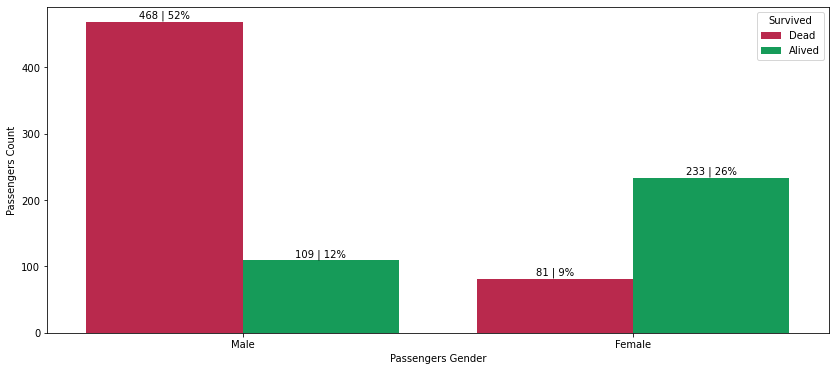

In [452]:
plt.figure(figsize = (14, 6))
sex_survived = sns.countplot(x = 'Sex' , hue = 'Survived' , data= titanic, palette = color_dead_alive)
notation(sex_survived, 6, titanic, True)
plt.xlabel('Passengers Gender')
plt.ylabel('Passengers Count')
plt.show()

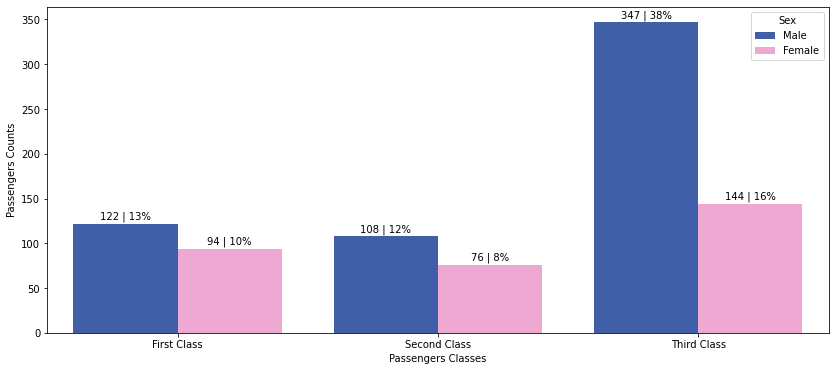

In [453]:
plt.figure(figsize = (14, 6))
pclass_survived = sns.countplot(x = 'Pclass' , hue = 'Sex' , data = titanic, order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_sex)
notation(pclass_survived , 5, titanic , True)
plt.xlabel('Passengers Classes')
plt.ylabel('Passengers Counts')
plt.show()

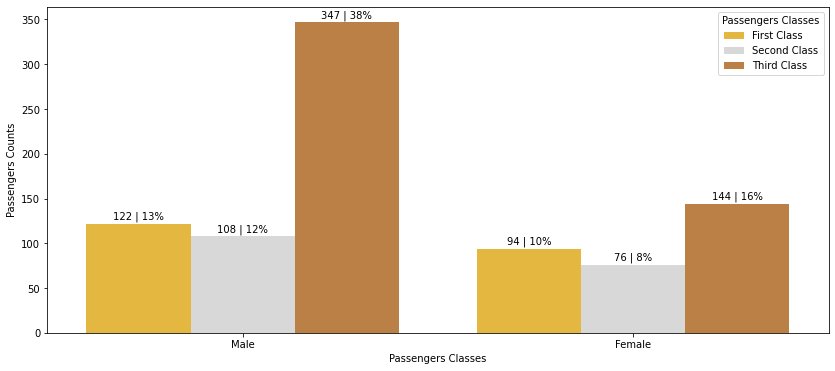

In [454]:
plt.figure(figsize = (14, 6))
pclass_survived = sns.countplot(x = 'Sex' , hue = 'Pclass' , data = titanic, hue_order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_classes)
notation(pclass_survived , 5, titanic , True)
plt.xlabel('Passengers Classes')
plt.ylabel('Passengers Counts')
plt.legend(title = 'Passengers Classes')

plt.show()

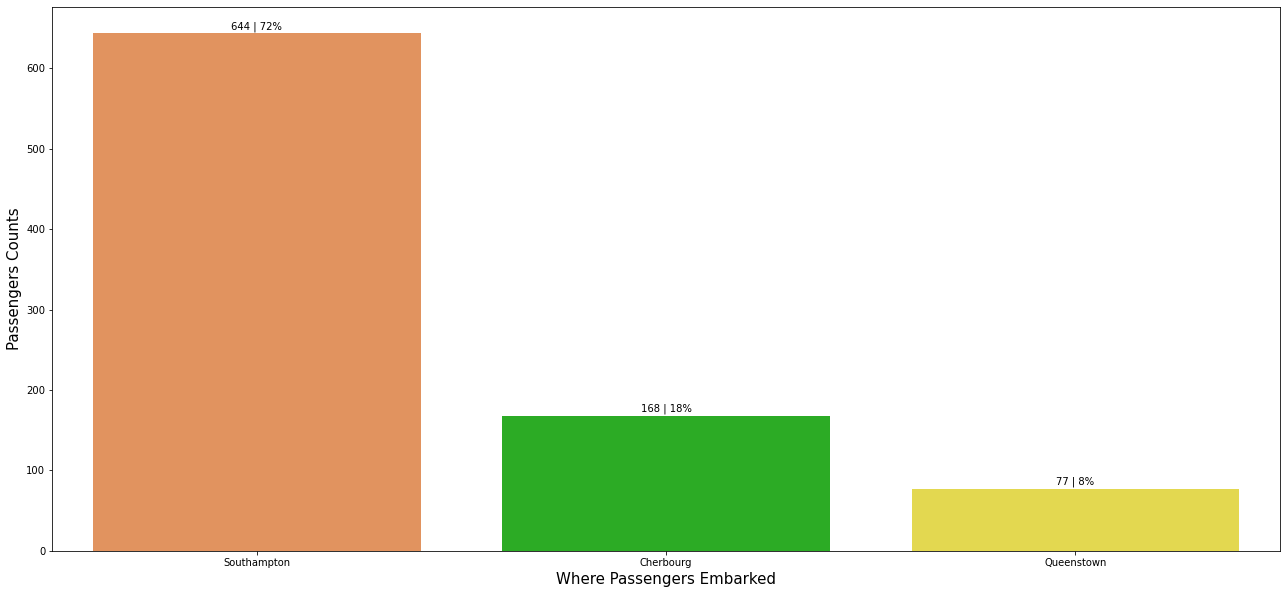

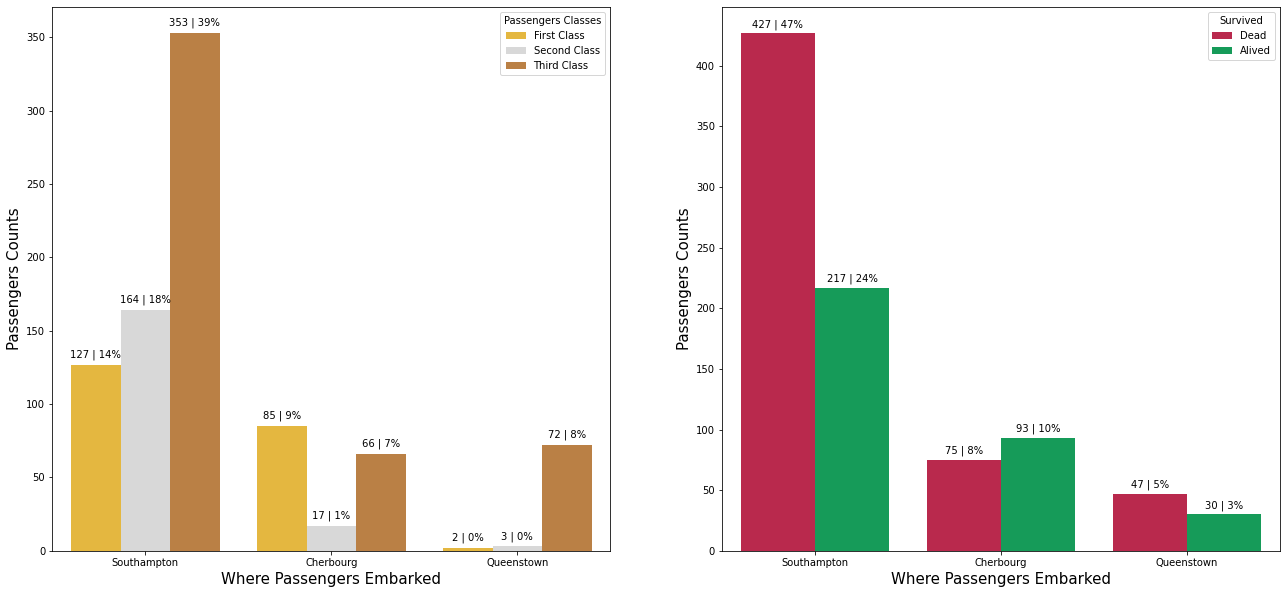

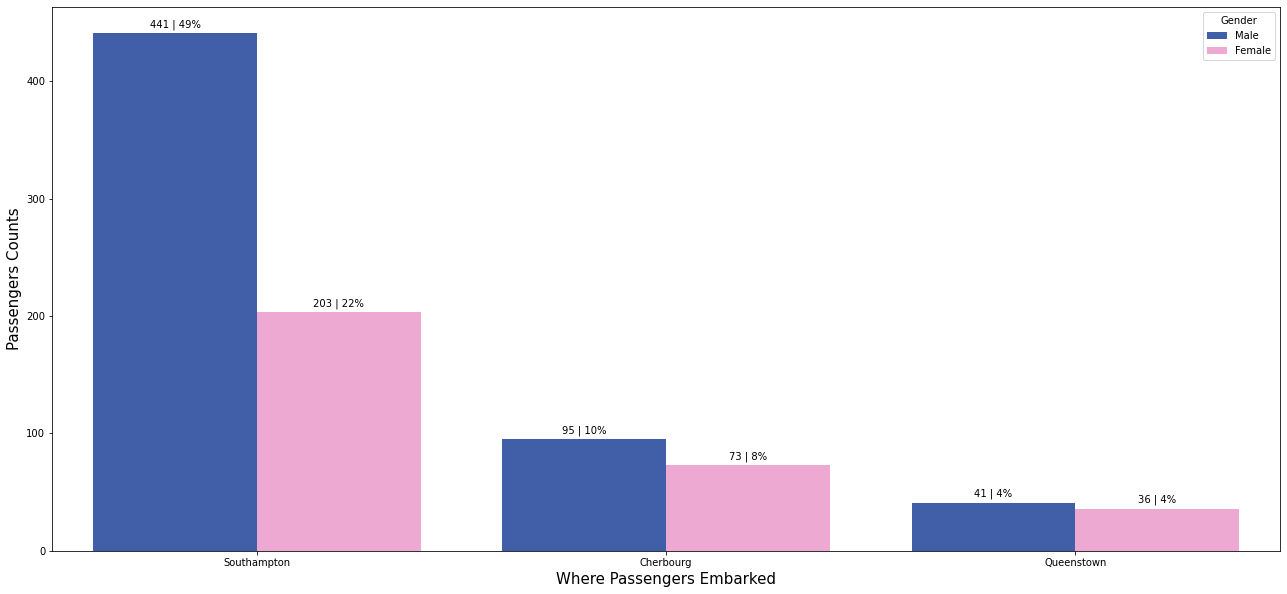

In [455]:
plt.figure(figsize = (22, 10))
pclass_survived = sns.countplot(x = 'Embarked'  , data = titanic, palette = color_embarked)
notation(pclass_survived , 5, titanic , True)
plt.xlabel('Where Passengers Embarked' , fontsize = 15)
plt.ylabel('Passengers Counts' , fontsize = 15)

fig , axes = plt.subplots(1,2,figsize = (22, 10))
pclass_embarked = sns.countplot(x = 'Embarked' , hue = 'Pclass' , data = titanic, hue_order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_classes , ax = axes[0])
notation(pclass_embarked , 5, titanic , True)
pclass_embarked.set_xlabel('Where Passengers Embarked', fontsize = 15)
pclass_embarked.set_ylabel('Passengers Counts', fontsize = 15)
pclass_embarked.legend(title = 'Passengers Classes')

survived_embarked = sns.countplot(x = 'Embarked' , hue = 'Survived' , data = titanic, palette = color_dead_alive, ax = axes[1])
notation(survived_embarked , 5, titanic , True)
survived_embarked.set_xlabel('Where Passengers Embarked', fontsize = 15)
survived_embarked.set_ylabel('Passengers Counts', fontsize = 15)
survived_embarked.legend(title = 'Survived')

plt.figure(figsize = (22, 10))
pclass_survived = sns.countplot(x = 'Embarked' , hue = 'Sex' , data = titanic, palette = color_sex)
notation(pclass_survived , 5, titanic , True)
plt.xlabel('Where Passengers Embarked' , fontsize = 15)
plt.ylabel('Passengers Counts' , fontsize = 15)
plt.legend(title = 'Gender')


plt.show()

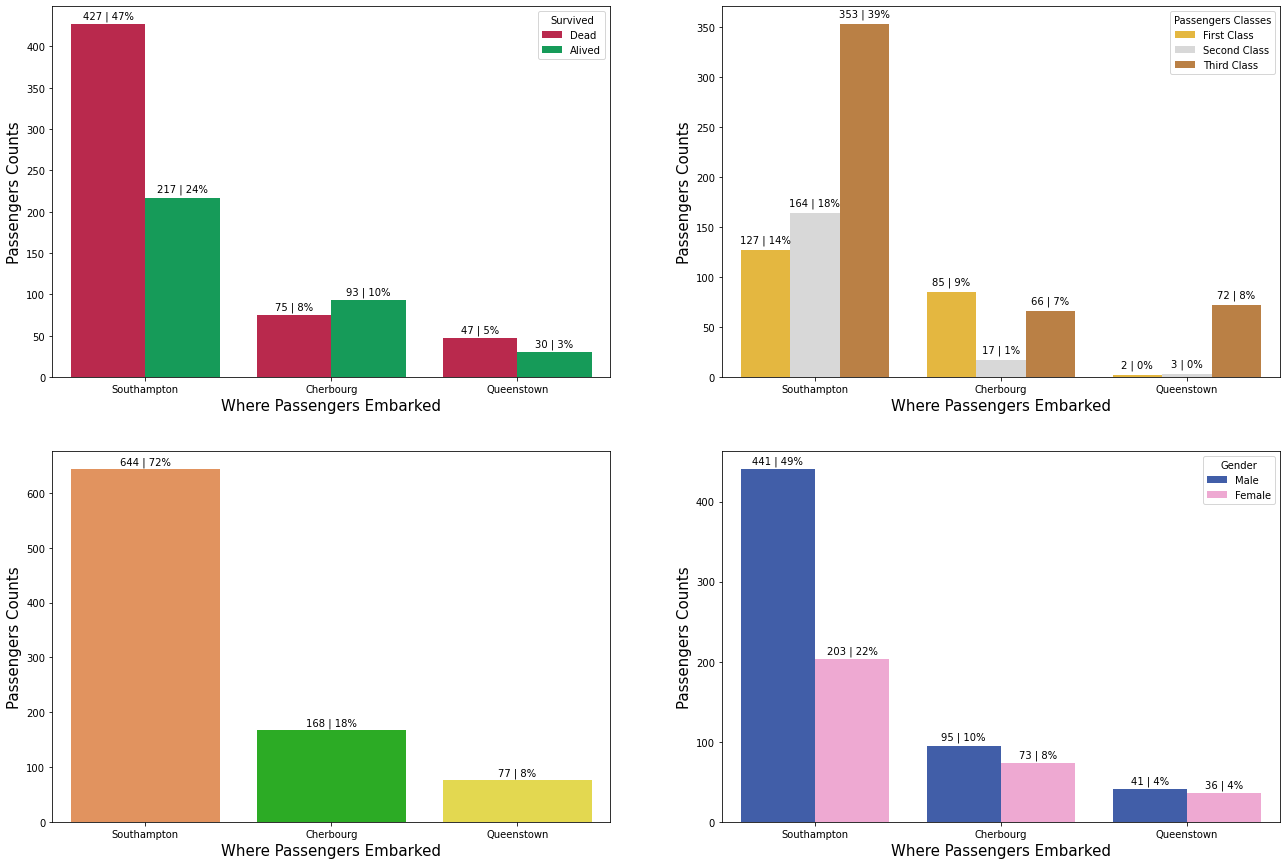

In [468]:
fig , axes = plt.subplots(2,2,figsize = (22, 15))
embarked_total = sns.countplot(x = 'Embarked'  , data = titanic, palette = color_embarked , ax = axes[1 , 0])
notation(embarked_total , 7, titanic , True)
embarked_total.set_xlabel('Where Passengers Embarked' , fontsize = 15)
embarked_total.set_ylabel('Passengers Counts' , fontsize = 15)


pclass_embarked = sns.countplot(x = 'Embarked' , hue = 'Pclass' , data = titanic, hue_order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_classes , ax = axes[ 0, 1])
notation(pclass_embarked , 7, titanic , True)
pclass_embarked.set_xlabel('Where Passengers Embarked', fontsize = 15)
pclass_embarked.set_ylabel('Passengers Counts', fontsize = 15)
pclass_embarked.legend(title = 'Passengers Classes')

survived_embarked = sns.countplot(x = 'Embarked' , hue = 'Survived' , data = titanic, palette = color_dead_alive, ax = axes[0 , 0])
notation(survived_embarked , 7, titanic , True)
survived_embarked.set_xlabel('Where Passengers Embarked', fontsize = 15)
survived_embarked.set_ylabel('Passengers Counts', fontsize = 15)
survived_embarked.legend(title = 'Survived')

sex_embarked = sns.countplot(x = 'Embarked' , hue = 'Sex' , data = titanic, palette = color_sex , ax = axes[1 , 1])
notation(sex_embarked , 7, titanic , True)
sex_embarked.set_xlabel('Where Passengers Embarked' , fontsize = 15)
sex_embarked.set_ylabel('Passengers Counts' , fontsize = 15)
sex_embarked.legend(title = 'Gender')

plt.show()

In [469]:
sex_summary_stats = titanic.groupby(['Survived' , 'Sex' , 'Pclass']).agg({'Age':[np.mean , np.median , np.min , np.max]})
sex_summary_stats.columns = ["Age Mean", "Age Median", "Age Min", "Age Max"]
sex_summary_stats = sex_summary_stats.reset_index()
sex_summary_stats

,Survived,Sex,Pclass,Age Mean,Age Median,Age Min,Age Max
0,Alived,Female,First Class,31.582418,33.0,1,63
1,Alived,Female,Second Class,27.300000,28.0,1,55
2,Alived,Female,Third Class,12.972222,9.0,1,63
3,Alived,Male,First Class,32.333333,35.0,1,80
4,Alived,Male,Second Class,14.294118,3.0,1,62
5,Alived,Male,Third Class,18.212766,20.0,1,45
6,Dead,Female,First Class,25.666667,25.0,2,50
7,Dead,Female,Second Class,36.000000,32.5,24,57
8,Dead,Female,Third Class,18.416667,18.0,1,48
9,Dead,Male,First Class,35.519481,39.0,1,71
